In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import copy
import tensorflow as tf

In [ ]:
cur_path = os.getcwd()
dat_path = cur_path + '/data'

## Training data full

In [ ]:
%%time
with open(dat_path + '/full_training_set.pkl','rb') as f:
    dat = pickle.load(f)

CPU times: user 3.89 s, sys: 1.05 s, total: 4.94 s
Wall time: 4.94 s


In [ ]:
dat.shape

(446478, 6)

In [ ]:
dat.head()

,CONTENT,ARTICLE,BUSINESS,CONSUMER,DOMESTIC,POSTAG
0,8개월 앞으로 다가온 베이징 올림픽이후 중국증시에 대한 전망이 크게 엇갈리고 있다고...,0,0,0,2,"[8/Number, 개월/Noun, 앞/Noun, 으로/Josa, 다가오다/Verb..."
1,HSBC는 지난 1964년 올림픽이후 도쿄증시도 연평균 21% 상승했고 개최이후 ...,0,0,0,2,"[HSBC/Alpha, 늘다/Verb, 지난/Noun, 1964년/Number, 올..."
2,반면 갤럭시증권은 한국 등과 같이 경제규모가 작은 나라는 올림픽 효과가 크지만 중...,0,0,0,2,"[반면/Noun, 갤럭시/Noun, 증권/Noun, 은/Josa, 한국/Noun, ..."
3,모간스탠리의 이코노미스트 출신인 앤디 시에는 올 한해 아시아 증시가 상승세를 보일 ...,0,1,0,3,"[모간/Noun, 스탠리/Noun, 의/Josa, 이코노미스트/Noun, 출신/No..."
4,반면 홍콩 증시는 연초에 급락장을 연출할 것으로 내다봤다.,0,2,0,2,"[반면/Noun, 홍콩/Noun, 증시/Noun, 는/Josa, 연초/Noun, 에..."


## Training data extraction

In [ ]:
#new_b_1_ids = pd.read_csv('data/신규B1_ids.csv')

In [ ]:
#new_b_1_ids

,idx
0,0
1,1
2,2
3,3
4,4
...,...
329397,446469
329398,446472
329399,446473
329400,446475


In [ ]:
#new_b_1_ids_list = list(new_b_1_ids['idx'])

In [ ]:
#len(new_b_1_ids_list)

329402

In [ ]:
#dat = dat.iloc[new_b_1_ids_list]

In [ ]:
new_b_2_ids = pd.read_csv('data/신규B2_ids.csv')
new_b_2_ids

,IDX
0,0
1,1
2,2
3,3
4,4
...,...
288222,420986
288223,420988
288224,420989
288225,420992


In [ ]:
new_b_2_ids_list = list(new_b_2_ids['IDX'])

In [ ]:
dat = dat.iloc[new_b_2_ids_list]

In [ ]:
dat.shape

(288227, 6)

In [ ]:
dat

,CONTENT,ARTICLE,BUSINESS,CONSUMER,DOMESTIC,POSTAG
0,8개월 앞으로 다가온 베이징 올림픽이후 중국증시에 대한 전망이 크게 엇갈리고 있다고...,0,0,0,2,"[8/Number, 개월/Noun, 앞/Noun, 으로/Josa, 다가오다/Verb..."
1,HSBC는 지난 1964년 올림픽이후 도쿄증시도 연평균 21% 상승했고 개최이후 ...,0,0,0,2,"[HSBC/Alpha, 늘다/Verb, 지난/Noun, 1964년/Number, 올..."
2,반면 갤럭시증권은 한국 등과 같이 경제규모가 작은 나라는 올림픽 효과가 크지만 중...,0,0,0,2,"[반면/Noun, 갤럭시/Noun, 증권/Noun, 은/Josa, 한국/Noun, ..."
3,모간스탠리의 이코노미스트 출신인 앤디 시에는 올 한해 아시아 증시가 상승세를 보일 ...,0,1,0,3,"[모간/Noun, 스탠리/Noun, 의/Josa, 이코노미스트/Noun, 출신/No..."
4,반면 홍콩 증시는 연초에 급락장을 연출할 것으로 내다봤다.,0,2,0,2,"[반면/Noun, 홍콩/Noun, 증시/Noun, 는/Josa, 연초/Noun, 에..."
...,...,...,...,...,...,...
420986,삼성전자는 릴라이언스 인더스트리 그룹 계열사인 릴라이언스지오의 4G 이동통신 네트...,0,0,0,0,"[삼/Modifier, 성/Modifier, 전자/Noun, 는/Josa, 릴라/N..."
420988,5G 이동통신 구축 사업도 추진하는 만큼 이번 회동에서 양측의 기술 협력 방안 등...,0,0,0,0,"[5/Number, G/Alpha, 이동통신/Noun, 구축/Noun, 사업/Nou..."
420989,한편 이재용 삼성전자 부회장이 인도를 방문한 것은 지난 3월 무케시 암바니 회장의...,0,0,0,0,"[한편/Noun, 이재용/Noun, 삼성/Noun, 전자/Noun, 부회장/Noun..."
420992,재계 관계자는 이 부회장이 모디 총리와 만날 가능성도 있는 것으로 안다 면서 그만...,0,0,0,0,"[재계/Noun, 관계자/Noun, 는/Josa, 이/Noun, 부회장/Noun, ..."


## Training data cleaning for X and y

In [ ]:
sent_len = [len(x) for x in dat['POSTAG']]
np.max(sent_len), np.mean(sent_len), np.min(sent_len)

(1083, 28.004218896911116, 0)

In [ ]:
[np.quantile(sent_len,i/10) for i in range(10)]

[0.0, 12.0, 16.0, 19.0, 22.0, 25.0, 29.0, 33.0, 39.0, 48.0]

In [ ]:
labs_business = dat['BUSINESS']
labs_domestic = dat['DOMESTIC'][dat['DOMESTIC'] > 0]
labs_domestic -= 1

In [ ]:
%%time
sents_business = np.array(dat['POSTAG'])
sent_business = np.concatenate(sents_business)

sents_domestic = np.array(dat['POSTAG'][dat['DOMESTIC'] > 0])
sent_domestic = np.concatenate(sents_domestic)

CPU times: user 3.48 s, sys: 5.38 s, total: 8.86 s
Wall time: 8.85 s


In [ ]:
len(sents_business), len(labs_business), len(sents_domestic), len(labs_domestic)

(288227, 288227, 203178, 203178)

<AxesSubplot:xlabel='BUSINESS', ylabel='count'>

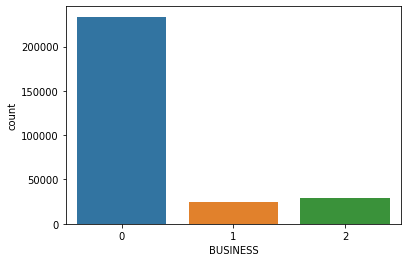

In [ ]:
sns.countplot(dat['BUSINESS'])

<AxesSubplot:xlabel='DOMESTIC', ylabel='count'>

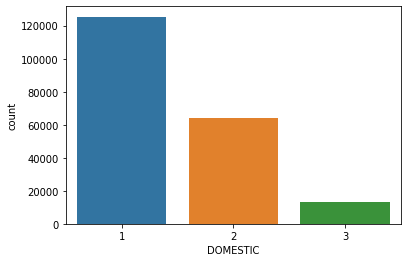

In [ ]:
sns.countplot(dat['DOMESTIC'][dat['DOMESTIC'] > 0])

<AxesSubplot:xlabel='DOMESTIC', ylabel='count'>

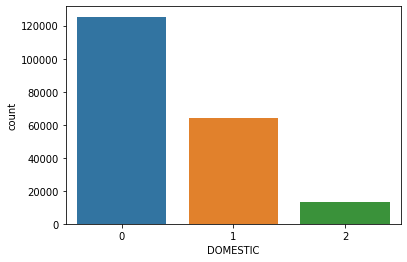

In [ ]:
sns.countplot(labs_domestic)

## Validation data load

In [ ]:
with open('data/20210901_20211020_labeled.pkl','rb') as f:
    valid_dat = pickle.load(f)

In [ ]:
valid_dat

,TITLE,SUB_CATEGORY,CONTENT,ARTICLE,BUSINESS,CONSUMER,DOMESTIC,POSTAG
0,“세금으로 집값 잡을 수 있다는 건 착각···허공에 공포탄 쏘는 격” 청론직설,경제 일반,하지만 종부세 폐지가 말처럼 쉽지 않다.,0,0,0,1,"[하지만/Conjunction, 종부세/Noun, 폐지/Noun, 가/Josa, 말..."
1,초점 이재용 상속 후 삼성 지배력 확대…10대 기업 총수 장악력 ↑,산업/재계,이재용 삼성 지배력 강화…10대 그룹 총수는 우호지분 확대 삼성은 이 부회장→삼성...,0,0,0,1,"[이재용/Noun, 삼성/Noun, 지배/Noun, 력/Suffix, 강화/Noun..."
2,특징주보성파워텍 정부 원전예산 증액 소식에 강세,증권,전날 산업통상자원부는 원전 관련 내년도 예산을 올해보다 4.8% 증가한 2076억...,0,0,0,1,"[전날/Noun, 산업/Noun, 통상/Noun, 자원부/Noun, 는/Josa, ..."
3,일문일답기재차관 경평 검증 독립성 침해 아냐…기술오류 검증 차원,경제 일반,비위의 유형은 고의나 중과실 위법 여부다.,0,0,0,1,"[비위/Noun, 의/Josa, 유형/Noun, 은/Josa, 고의/Noun, 나/..."
4,1차 사전청약에 9만4000여명 몰렸다…경쟁률 21.6대1,부동산,공공분양주택 일반공급 당첨선은 평균 1945만원 수준이며 청약 저축 최고 불입액은...,0,0,0,1,"[공공/Modifier, 분양/Noun, 주택/Noun, 일반/Noun, 공급/No..."
...,...,...,...,...,...,...,...,...
4995,군인공제회 국내 PEF·VC에 2500억원 출자,경제 일반,PE 분야에서는 IMM인베스트먼트 JKL파트너스 제이앤프라이빗에쿼티 등 3곳이 선...,0,0,0,2,"[PE/Alpha, 분야/Noun, 에서는/Josa, IMM/Alpha, 인베스트먼..."
4996,美 램리서치 화성공장 증설로 생산 2배 확대... 日 TEL 발안공장에 R&D 인프...,산업/재계,램리서치는 올 5월 정부의 ‘K반도체 전략’ 발표 당시 “국내 생산능력을 2배로 ...,0,0,0,2,"[램/Noun, 리서치/Noun, 는/Josa, 오다/Verb, 5월/Number,..."
4997,재송19일 장 마감 후 주요 종목뉴스,증권,△신세계 004170 계열사 신세계센트럴시티에 신세계 강남점 1층 F 중층 리뉴얼...,0,0,0,1,"[△/Foreign, 신세계/Noun, 004170/Number, 계/Noun, 열..."
4998,우리금융 우리금융 생명의 숲 3호 조성 기부금 전달,금융,진명여고는 1906년 순헌황귀비의 사촌 엄준원에 의해 민족자본으로 설립된 우리나라...,0,0,0,2,"[진명여고/Noun, 는/Josa, 1906년/Number, 순헌황귀비/Noun, ..."


<AxesSubplot:xlabel='BUSINESS', ylabel='count'>

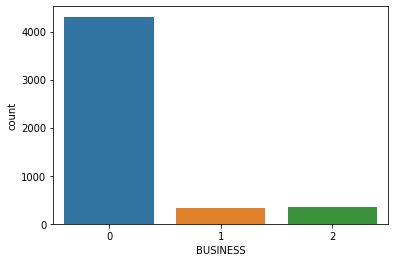

In [ ]:
sns.countplot(valid_dat['BUSINESS'])

<AxesSubplot:xlabel='DOMESTIC', ylabel='count'>

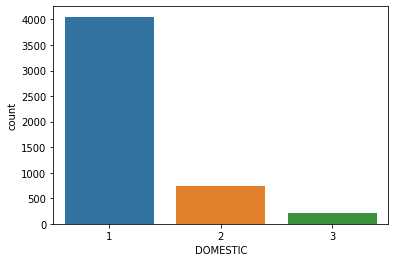

In [ ]:
sns.countplot(valid_dat['DOMESTIC'])

## Validation data cleaning

In [ ]:
sent_len = [len(x) for x in valid_dat['POSTAG']]
np.max(sent_len), np.mean(sent_len), np.min(sent_len)

(1076, 29.8572, 4)

In [ ]:
[np.quantile(sent_len,i/10) for i in range(10)]

[4.0, 13.0, 17.0, 20.0, 23.0, 26.0, 30.0, 34.0, 40.0, 49.0]

In [ ]:
valid_labs_business = valid_dat['BUSINESS']
valid_labs_domestic = valid_dat['DOMESTIC'][valid_dat['DOMESTIC'] > 0]
valid_labs_domestic -= 1

<AxesSubplot:xlabel='DOMESTIC', ylabel='count'>

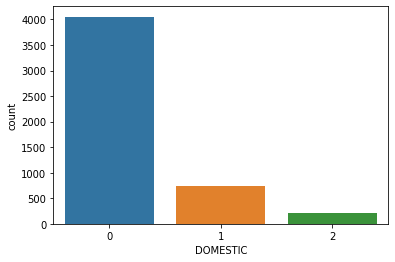

In [ ]:
sns.countplot(valid_labs_domestic)

In [ ]:
%%time
valid_sents_business = np.array(valid_dat['POSTAG'])
valid_sent_business = np.concatenate(valid_sents_business)

valid_sents_domestic = np.array(valid_dat['POSTAG'][valid_dat['DOMESTIC'] > 0])
valid_sent_domestic = np.concatenate(valid_sents_domestic)

CPU times: user 60.5 ms, sys: 2.35 ms, total: 62.9 ms
Wall time: 60.7 ms


In [ ]:
len(valid_sents_business), len(valid_labs_business), len(valid_sents_domestic), len(valid_labs_domestic)

(5000, 5000, 5000, 5000)

## Vectorization

In [ ]:
import gensim
import sklearn

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
with open('data/case4_20060901_20210831_wv.pkl','rb') as f:
    new_wv = pickle.load(f)

In [ ]:
type(new_wv)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
new_wv.save('new.wv')

In [ ]:
new_wv = new_wv.load('new.wv')

In [ ]:
len(new_wv)

114324

In [ ]:
# default_wv.__dict__.keys()

In [ ]:
max_words = len(new_wv)

In [ ]:
clean_sentence_business = [[token_val for token_val in sentence_tokens if token_val in new_wv] for sentence_tokens in sents_business]
clean_sentence_domestic = [[token_val for token_val in sentence_tokens if token_val in new_wv] for sentence_tokens in sents_domestic]

In [ ]:
%%time
vectorized_sent_business = []
idx_business = []
for i,c in enumerate(clean_sentence_business):
    if len(c)==0:
        continue
    vectorized_sent_business.append(new_wv[c].mean(0))
    idx_business.append(i)

CPU times: user 22 s, sys: 81 ms, total: 22.1 s
Wall time: 22.1 s


In [ ]:
%%time
vectorized_sent_domestic = []
idx_domestic = []
for i,c in enumerate(clean_sentence_domestic):
    if len(c)==0:
        continue
    vectorized_sent_domestic.append(new_wv[c].mean(0))
    idx_domestic.append(i)

CPU times: user 15.8 s, sys: 92.4 ms, total: 15.9 s
Wall time: 15.9 s


In [ ]:
y_sent_business = np.array(labs_business)[idx_business]
y_sent_domestic = np.array(labs_domestic)[idx_domestic]

In [ ]:
valid_clean_sentence_business = [[token_val for token_val in sentence_tokens if token_val in new_wv] for sentence_tokens in valid_sents_business]
valid_clean_sentence_domestic = [[token_val for token_val in sentence_tokens if token_val in new_wv] for sentence_tokens in valid_sents_domestic]

In [ ]:
%%time
valid_vectorized_sent_business = []
valid_idx_business = []
for i,c in enumerate(valid_clean_sentence_business):
    if len(c)==0:
        continue
    valid_vectorized_sent_business.append(new_wv[c].mean(0))
    valid_idx_business.append(i)

CPU times: user 436 ms, sys: 3.87 ms, total: 439 ms
Wall time: 438 ms


In [ ]:
%%time
valid_vectorized_sent_domestic = []
valid_idx_domestic = []
for i,c in enumerate(valid_clean_sentence_domestic):
    if len(c)==0:
        continue
    valid_vectorized_sent_domestic.append(new_wv[c].mean(0))
    valid_idx_domestic.append(i)

CPU times: user 418 ms, sys: 1.01 ms, total: 419 ms
Wall time: 417 ms


In [ ]:
valid_y_sent_business = np.array(valid_labs_business)[valid_idx_business]
valid_y_sent_domestic = np.array(valid_labs_domestic)[valid_idx_domestic]

## Model specification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score

## Neural Net

In [ ]:
#X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(
#    vectorized_sent_business, y_sent_business, test_size=0.2, random_state=1)

In [ ]:
X_train_business, X_test_business, y_train_business, y_test_business = vectorized_sent_business, valid_vectorized_sent_business, y_sent_business, valid_y_sent_business

In [ ]:
X_train_domestic, X_test_domestic, y_train_domestic, y_test_domestic = vectorized_sent_domestic, valid_vectorized_sent_domestic, y_sent_domestic, valid_y_sent_domestic

In [ ]:
%%time
train_ds_business = tf.data.Dataset.from_tensor_slices((X_train_business, y_train_business)).shuffle(1000).batch(64)
valid_ds_business = tf.data.Dataset.from_tensor_slices((X_test_business, y_test_business)).batch(64)

CPU times: user 10.2 s, sys: 135 ms, total: 10.3 s
Wall time: 10.3 s


In [ ]:
%%time
train_ds_domestic = tf.data.Dataset.from_tensor_slices((X_train_domestic, y_train_domestic)).shuffle(1000).batch(64)
valid_ds_domestic = tf.data.Dataset.from_tensor_slices((X_test_domestic, y_test_domestic)).batch(64)

CPU times: user 7.12 s, sys: 98.2 ms, total: 7.22 s
Wall time: 7.2 s


In [ ]:
inp_business = tf.keras.layers.Input(shape=(100,))
dense1_business = tf.keras.layers.Dense(64, activation='relu')(inp_business)
dense1_business = tf.keras.layers.Dense(64, activation='relu')(inp_business)
dense1_business = tf.keras.layers.Dense(64, activation='relu')(inp_business)
dense1_business = tf.keras.layers.Dense(64, activation='relu')(inp_business)
dense2_business = tf.keras.layers.Dense(3)(dense1_business)
softmax_business = tf.keras.layers.Softmax()(dense2_business)

model_business = tf.keras.Model(inputs=inp_business, outputs=softmax_business)

In [ ]:
inp_domestic = tf.keras.layers.Input(shape=(100,))
dense1_domestic = tf.keras.layers.Dense(64, activation='relu')(inp_domestic)
dense1_domestic = tf.keras.layers.Dense(64, activation='relu')(inp_domestic)
dense1_domestic = tf.keras.layers.Dense(64, activation='relu')(inp_domestic)
dense1_domestic = tf.keras.layers.Dense(64, activation='relu')(inp_domestic)
dense2_domestic = tf.keras.layers.Dense(3)(dense1_domestic)
softmax_domestic = tf.keras.layers.Softmax()(dense2_domestic)

model_domestic = tf.keras.Model(inputs=inp_domestic, outputs=softmax_domestic)

In [ ]:
model_business.summary()
model_business.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 195       
_________________________________________________________________
softmax (Softmax)            (None, 3)                 0         
Total params: 6,659
Trainable params: 6,659
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_domestic.summary()
model_domestic.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['accuracy'])

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 6,659
Trainable params: 6,659
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_business = model_business.fit(train_ds_business, epochs=5, validation_data = valid_ds_business)

Epoch 1/5
4504/4504 [==============================] - 5s 1ms/step - loss: 0.4482 - accuracy: 0.8263 - val_loss: 0.3962 - val_accuracy: 0.8580
Epoch 2/5
4504/4504 [==============================] - 5s 1ms/step - loss: 0.4299 - accuracy: 0.8319 - val_loss: 0.3929 - val_accuracy: 0.8614
Epoch 3/5
4504/4504 [==============================] - 5s 1ms/step - loss: 0.4237 - accuracy: 0.8334 - val_loss: 0.3968 - val_accuracy: 0.8610
Epoch 4/5
4504/4504 [==============================] - 5s 1ms/step - loss: 0.4204 - accuracy: 0.8346 - val_loss: 0.3972 - val_accuracy: 0.8582
Epoch 5/5
4504/4504 [==============================] - 5s 1ms/step - loss: 0.4175 - accuracy: 0.8353 - val_loss: 0.4001 - val_accuracy: 0.8572


In [ ]:
history_domestic = model_domestic.fit(train_ds_domestic, epochs=5, validation_data = valid_ds_domestic)

Epoch 1/5
3175/3175 [==============================] - 3s 1ms/step - loss: 0.5395 - accuracy: 0.7878 - val_loss: 0.4085 - val_accuracy: 0.8616
Epoch 2/5
3175/3175 [==============================] - 3s 1ms/step - loss: 0.5085 - accuracy: 0.8008 - val_loss: 0.4077 - val_accuracy: 0.8624
Epoch 3/5
3175/3175 [==============================] - 3s 1ms/step - loss: 0.4985 - accuracy: 0.8053 - val_loss: 0.4031 - val_accuracy: 0.8646
Epoch 4/5
3175/3175 [==============================] - 3s 1ms/step - loss: 0.4922 - accuracy: 0.8073 - val_loss: 0.4065 - val_accuracy: 0.8656
Epoch 5/5
3175/3175 [==============================] - 3s 1ms/step - loss: 0.4872 - accuracy: 0.8091 - val_loss: 0.3918 - val_accuracy: 0.8696


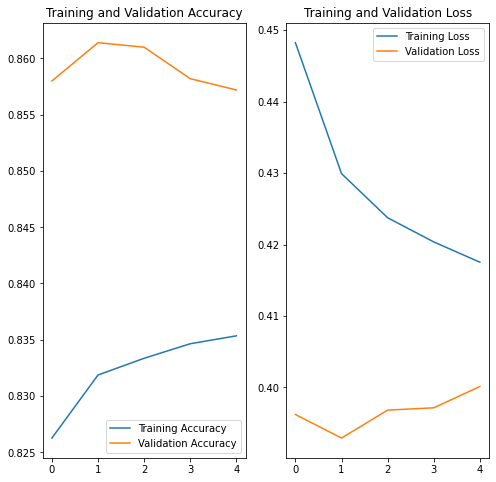

In [ ]:
acc = history_business.history['accuracy']
val_acc = history_business.history['val_accuracy']

loss = history_business.history['loss']
val_loss = history_business.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

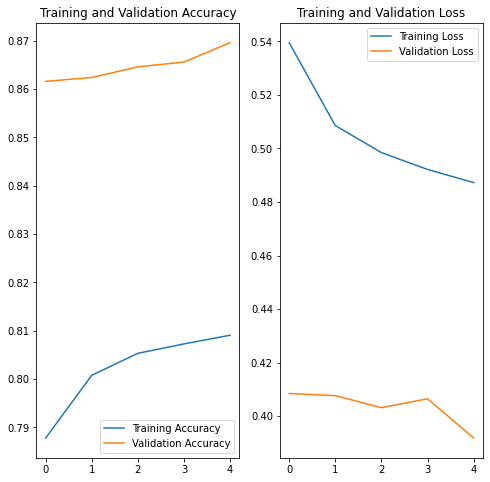

In [ ]:
acc = history_domestic.history['accuracy']
val_acc = history_domestic.history['val_accuracy']

loss = history_domestic.history['loss']
val_loss = history_domestic.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pred_dnn_business = model_business.predict(np.concatenate([X_train_business,X_test_business]))

In [ ]:
accuracy_score(np.argmax(pred_dnn_business,axis=1),np.concatenate([y_train_business,y_test_business]))

0.8032338486618851

In [ ]:
pred_dnn_domestic = model_domestic.predict(np.concatenate([X_train_domestic,X_test_domestic]))

In [ ]:
accuracy_score(np.argmax(pred_dnn_domestic,axis=1),np.concatenate([y_train_domestic,y_test_domestic]))

0.7833583136373244

In [ ]:
#svm acc: 0.74228

## Linear model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time
lr_business = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
#lr.fit(red_vec,red_y)
lr_business.fit(vectorized_sent_business,y_sent_business)

CPU times: user 1min 8s, sys: 2min 31s, total: 3min 39s
Wall time: 15.4 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [ ]:
pred_lr_business = lr_business.predict(vectorized_sent_business)

In [ ]:
accuracy_score(pred_lr_business,y_sent_business)

0.8181922272224169

In [ ]:
%%time
lr_domestic = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
#lr.fit(red_vec,red_y)
lr_domestic.fit(vectorized_sent_domestic,y_sent_domestic)

CPU times: user 49 s, sys: 1min 45s, total: 2min 34s
Wall time: 10.7 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [ ]:
pred_lr_domestic = lr_domestic.predict(vectorized_sent_domestic)

In [ ]:
accuracy_score(pred_lr_domestic,y_sent_domestic)

0.7734342698509579

## Test on the new samples

In [ ]:
from tqdm import tqdm

In [ ]:
import re
import os

In [ ]:
os.getcwd()

'/home/work/2110059/nsi/doe'

In [ ]:
filelist = os.listdir('data/classified_sent')

In [ ]:
len(filelist)

707

In [ ]:
filelist.sort()

In [ ]:
filelist = np.array(filelist)[[re.match('^20',x)!=None for x in filelist]]

In [ ]:
filelist[0].split('.')[0]

'20191225'

In [ ]:
dat = {}
for f in tqdm(filelist, total = len(filelist)):
    try:
        dat['{}'.format(f.split('.')[0])] = pickle.load(open('./data/classified_sent/'+f,'rb'))
    except:
        print(f.split('.')[0])

100%|██████████| 707/707 [01:43<00:00,  6.85it/s]


In [ ]:
vect = {}

for f in tqdm(filelist, total = len(filelist)):
    sents = dat['{}'.format(f.split('.')[0])]['POSTAG']
    clean_sentence = [[token_val for token_val in sentence_tokens if token_val in new_wv] for sentence_tokens in sents]
    vectorized_sent = []
    idx = []
    for i,c in enumerate(clean_sentence):
        if len(c)==0:
            continue
        vectorized_sent.append(new_wv[c].mean(0))
        idx.append(i)
    
    vect['{}'.format(f.split('.')[0])] = vectorized_sent

100%|██████████| 707/707 [15:13<00:00,  1.29s/it]


In [ ]:
#with open('./data/vect2020_2021.pkl','wb') as f:
#    pickle.dump(vect,f)

In [ ]:
%%time
with open('./data/vect2020_2021.pkl','rb') as f:
    vect = pickle.load(f)

CPU times: user 8.56 s, sys: 5.61 s, total: 14.2 s
Wall time: 14.2 s


In [ ]:
len(vect['20210101'])

10000

In [ ]:
pred_business = {}
pred_domestic = {}

for f in tqdm(filelist, total = len(filelist)):
    #pred_dnn_business = model_business.predict(np.array(vect['{}'.format(f.split('.')[0])])) #dnn
    pred_dnn_business = lr_business.predict(np.array(vect['{}'.format(f.split('.')[0])])) #lr
    #pred_dnn_domestic = model_domestic.predict(np.array(vect['{}'.format(f.split('.')[0])])) #dnn
    pred_dnn_domestic = lr_domestic.predict(np.array(vect['{}'.format(f.split('.')[0])])) #lr
    
    pred_business['{}'.format(f.split('.')[0])] = pred_dnn_business
    pred_domestic['{}'.format(f.split('.')[0])] = pred_dnn_domestic

100%|██████████| 707/707 [00:19<00:00, 36.55it/s]


In [ ]:
#pred_nn = pred

In [ ]:
pred_business['20210101'].shape

(10000,)

In [ ]:
pred_domestic['20210101'].shape

(10000,)

In [ ]:
pred_business['20210101']

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred_domestic['20210101']

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# dnn case
pred_nn_business = {}
pred_nn_domestic = {}
for date in pred_business:
    pred_nn_business[date] = np.argmax(pred_business[date],axis=1)
    pred_nn_domestic[date] = np.argmax(pred_domestic[date],axis=1)

In [ ]:
# lr case
pred_nn_business = pred_business
pred_nn_domestic = pred_domestic

In [ ]:
pred_nn_business['20210101'].shape

(10000,)

In [ ]:
pred_nn_domestic['20210101'].shape

(10000,)

In [ ]:
np.unique(pred_nn_business['20210101'],return_counts=True)

(array([0, 1, 2]), array([9556,  295,  149]))

In [ ]:
np.unique(pred_nn_domestic['20210101'],return_counts=True)

(array([0, 1, 2]), array([8741, 1223,   36]))

In [ ]:
np.unique(pred_nn_business['20210101'][pred_nn_domestic['20210101'] == 0],return_counts=True)

(array([0, 1, 2]), array([8357,  254,  130]))

In [ ]:
pred_nn_business_domestic = {}
for date in pred_nn_business:
    pred_nn_business_domestic[date] = pred_nn_business[date][pred_nn_domestic[date] == 0]

In [ ]:
nsi = []

for f in tqdm(filelist, total = len(filelist)):
    #nsi.append(np.unique(np.argmax(pred['{}'.format(f.split('.')[0])],axis=1),return_counts=True)[1])
    #nsi.append(np.unique(pred['{}'.format(f.split('.')[0])],return_counts=True)[1])
    nsi.append(np.unique(pred_nn_business_domestic['{}'.format(f.split('.')[0])],return_counts=True)[1])
nsi = np.array(nsi)

100%|██████████| 707/707 [00:00<00:00, 7789.67it/s]


In [ ]:
np.sum(nsi,axis=0)/np.sum(nsi)

array([0.97241347, 0.0153661 , 0.01222044])

In [ ]:
date = [x.split('.')[0] for x in filelist]

In [ ]:
len(date[7:])

700

In [ ]:
nsi_w = []
for i in range(7,len(filelist)):
    nsi_w.append(np.sum(nsi[(i-7):i],axis=0))

In [ ]:
nsi_w = np.array(nsi_w)

In [ ]:
nsi = nsi_w

In [ ]:
nsi.shape

(700, 3)

In [ ]:
osinn = (nsi[:,1]-nsi[:,2])/(nsi[:,1]+nsi[:,2])*100+100

In [ ]:
np.mean((nsi[:,1]-nsi[:,2])/(nsi[:,1]+nsi[:,2])*100+100)

112.97375909128488

In [ ]:
#orig = pd.read_csv('data/nsi.csv')

In [ ]:
#orig21 = orig.nsi

In [ ]:
osinn.shape

(700,)

In [ ]:
#orig21.shape

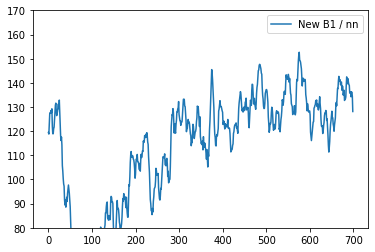

In [ ]:
plt.plot(osinn, label='New B1 / nn')
#plt.plot(orig21.values[1:], label='current nsi')

plt.ylim([80,170])
plt.legend(ncol=2)

In [ ]:
pd.DataFrame(osinn).to_csv('data/new_b2_lr.csv')
#pd.DataFrame(osinn).to_csv('data/new_b2_dnn.csv')

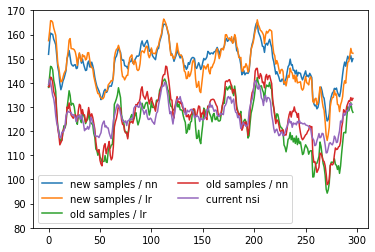

In [ ]:
plt.plot(nsinn['0'],label='new samples / nn')
plt.plot(nsilr['0'],label='new samples / lr')

#plt.plot(osinn)
plt.plot(osilr, label='old samples / lr')
plt.plot(osinn, label='old samples / nn')
plt.plot(orig21.values[1:], label='current nsi')

plt.ylim([80,170])
plt.legend(ncol=2)

In [ ]:
#pd.DataFrame(nsilr).to_csv('nsilr')

In [ ]:
#pd.DataFrame(nsinn).to_csv('nsinn')

In [ ]:
nsilr = pd.read_csv('nsilr')
nsinn = pd.read_csv('nsinn')